## Task 1: Data Exploration

### 1. Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/boston_housing.csv")

# Display first few rows
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
# Check the number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 506 rows and 14 columns.


### 2. Explore the Data Structure, Types, and Summary Statistics

In [3]:
# Check data structure
print(df.info())

# Summary statistics
print(df.describe())

# Check column names
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

### 3. Visualize Relationships Between Features and the Target Variable

#### Relationships Between Features and the Median Value of Owner-Occupied Homes in $1000s (Target)

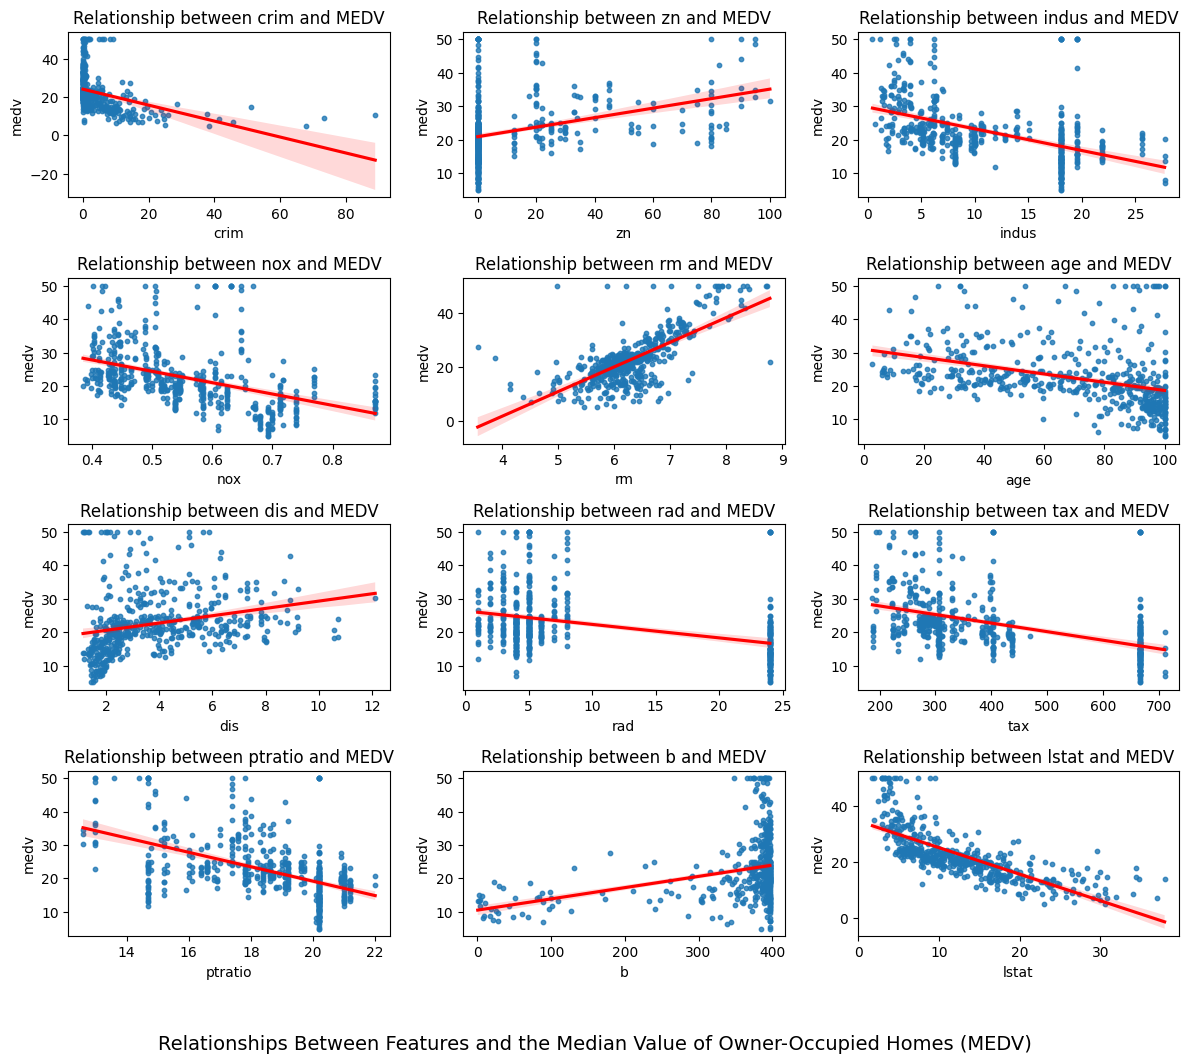

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plots with regression lines for each relevant feature
features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Plotting the relationships
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns for better layout
    sns.regplot(x=feature, y='medv', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f'Relationship between {feature} and MEDV')

# Add a figure title below the plots
plt.figtext(0.5, -0.05, 'Relationships Between Features and the Median Value of Owner-Occupied Homes (MEDV)', ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()


#### Correlation Heatmap

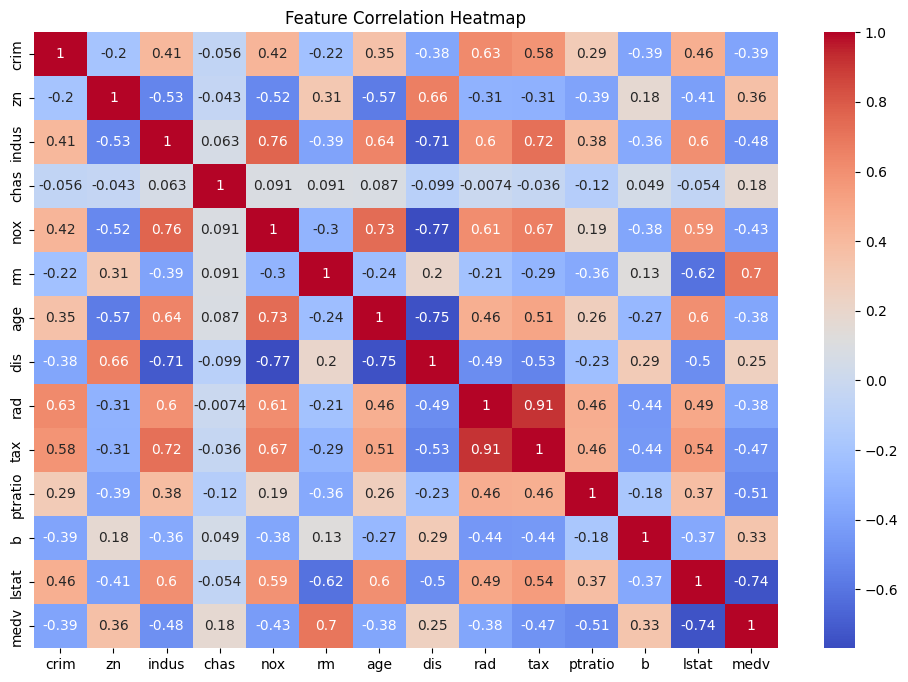

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


### 4. Identify Missing Values and Outliers

#### Identifying Missing Values

In [12]:
# Check for missing values
print(df.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


#### Identifying Outliers

##### Boxplots

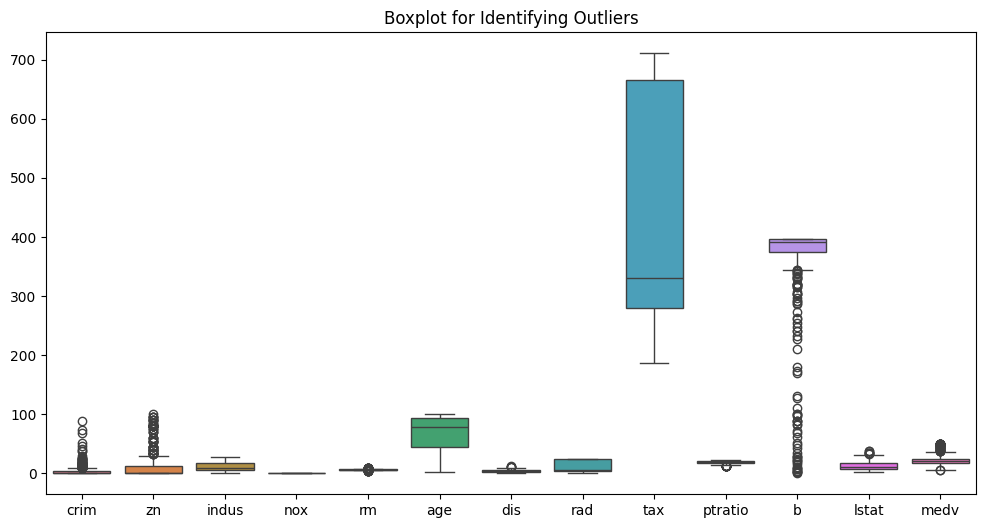

In [38]:
# Boxplot to identify outliers in key numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']])
plt.title("Boxplot for Identifying Outliers")
plt.show()


##### IQR (Interquartile Range) Method

In [34]:
# Calculate the IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers: values outside of (Q1 - 1.5*IQR) and (Q3 + 1.5*IQR)
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum(axis=0)
print("Outliers based on IQR:\n", outliers_iqr)


Outliers based on IQR:
 crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64
